In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old


Welcome to JupyROOT 6.12/04


In [2]:
def trolley_run_station_average_2(corrected_df):
        
    station_edges = trfp.STATION_BARCODE_EDGES
    station_edges_6_probe = trfp.STATION_BARCODE_EDGES_6

    # tr_phi is not monotonic, so sort by tr_phi

    corrected_df = corrected_df.sort_values(by=['tr_phi'])

    measured_phi = corrected_df['tr_phi'].values
    measured_extent = (np.roll(measured_phi,-1)-np.roll(measured_phi,1))/2
    measured_extent[0] = measured_extent[0]+180
    measured_extent[-1] = measured_extent[-1]+180
    # print np.max(measured_extent)

    corrected_df['tr_extent'] = pd.Series(measured_extent, index=corrected_df.index)
    corrected_df = corrected_df.sort_index()

    # for a given station:
    # create a mask for when trolley is in [low edge, high edge)
    tr_baseline = np.full((72,17), np.nan)
    fp_baseline = np.full((72,6), np.nan)
    summed_azimuth = np.full((72,6), np.nan)
    summed_pts = np.full((72,6), np.nan)
    baseline_time = np.full((72,6), np.nan)

    for st in range(72):
        
        num_probes = len(trfp.STATION_PROBE_ID[st])
        # first do m1-4 for all stations
        
        if station_edges[st+1] > station_edges[st]:
            mask = (corrected_df['tr_phi'] >= station_edges[st]) & (corrected_df['tr_phi'] < station_edges[st+1])
        else:  # case where we go over the 360 deg line
            mask = (corrected_df['tr_phi'] >= station_edges[st]) | (corrected_df['tr_phi'] < station_edges[st+1])

        out_df = corrected_df[mask].copy()
        summed_pts[st, :] = out_df.shape[0]
        summed_azimuth[st, :] = sum(out_df['tr_extent'].values)
        baseline_time[st, :] = sum(out_df.index.values)/summed_pts[st, 0]

        for m in range(6):
            st_id = 'tr,m'+str(m+1)
            if sum(out_df['tr_extent'].values) != 0:
                tr_baseline[st, m] = sum(out_df['tr_extent'].values*out_df[st_id].values)/sum(out_df['tr_extent'].values)

            st_id = 'st'+str(st)+',m'+str(m+1)
            if sum(out_df['tr_extent'].values) != 0:
                fp_baseline[st, m] = np.mean(out_df[st_id])
                
        for m in range(6,17):
            st_id = 'tr,m'+str(m+1)
            if sum(out_df['tr_extent'].values) != 0:
                tr_baseline[st, m] = sum(out_df['tr_extent'].values*out_df[st_id].values)/sum(out_df['tr_extent'].values)
    
    return tr_baseline, fp_baseline, baseline_time, summed_azimuth, summed_pts

In [9]:
filename = 'hdf5/60hr.h5'

tr_interp_df_1 = pd.read_hdf(filename, key='tr_df_1')
tr_interp_df_2 = pd.read_hdf(filename, key='tr_df_2')

tr_moment_df_1 = helper.calc_moment_df(tr_interp_df_1)
tr_moment_df_2 = helper.calc_moment_df(tr_interp_df_2)

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)

tr_baseline_1, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_1)
tr_baseline_2, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_2)

sync_offsets_1, _ = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)

delta_tr_60hr_1 = np.mean(tr_baseline_2 - tr_baseline_1, axis=0)
so_60hr_1 = np.mean(sync_offsets_1,axis=0)


Finished calculating all moments for 4386 events.
Finished calculating all moments for 4363 events.
Removing trolley image from station 71.                        


In [22]:
filename = 'hdf5/9day.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))
print 'tr run 4'
tr_moment_df_4 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_4'))
print 'tr run 5'
tr_moment_df_5 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_5'))
print 'tr run 6'
tr_moment_df_6 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_6'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)

tr_baseline_1, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_1)
tr_baseline_2, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_2)
tr_baseline_3, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_3)
tr_baseline_4, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_4)
tr_baseline_5, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_5)
tr_baseline_6, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_6)

delta_tr_9day_1 = np.mean(tr_baseline_2 - tr_baseline_1, axis=0)
delta_tr_9day_2 = np.mean(tr_baseline_4 - tr_baseline_3, axis=0)
delta_tr_9day_3 = np.mean(tr_baseline_5 - tr_baseline_4, axis=0)
delta_tr_9day_4 = np.mean(tr_baseline_6 - tr_baseline_5, axis=0)

sync_offsets_1, _ = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)
sync_offsets_2, _ = helper.sync_offset_calc(tr_corr_df_3, tr_corr_df_4)
sync_offsets_3, _ = helper.sync_offset_calc(tr_corr_df_4, tr_corr_df_5)
sync_offsets_4, _ = helper.sync_offset_calc(tr_corr_df_5, tr_corr_df_6)

so_9day_1 = np.mean(sync_offsets_1, axis=0)
so_9day_2 = np.mean(sync_offsets_2, axis=0)
so_9day_3 = np.mean(sync_offsets_3, axis=0)
so_9day_4 = np.mean(sync_offsets_4, axis=0)


tr run 1
Finished calculating all moments for 4344 events.
tr run 2
Finished calculating all moments for 4357 events.
tr run 3
Finished calculating all moments for 4359 events.
tr run 4
Finished calculating all moments for 4360 events.
tr run 5
Finished calculating all moments for 4702 events.
tr run 6
Finished calculating all moments for 4356 events.
Removing trolley image from station 71.                                                                          


In [11]:
filename = 'hdf5/endgame.h5'

print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))
print 'tr run 4'
tr_moment_df_4 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_4'))
print 'tr run 5'
tr_moment_df_5 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_5'))
print 'tr run 6'
tr_moment_df_6 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_6'))
print 'tr run 7'
tr_moment_df_7 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_7'))
print 'tr run 8'
tr_moment_df_8 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_8'))

tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)
tr_corr_df_7 = helper_old.trolley_footprint_replacement(tr_moment_df_7)
tr_corr_df_8 = helper_old.trolley_footprint_replacement(tr_moment_df_8)

tr_baseline_2, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_2)
tr_baseline_3, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_3)
tr_baseline_4, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_4)
tr_baseline_5, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_5)
tr_baseline_6, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_6)
tr_baseline_7, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_7)
tr_baseline_8, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_8)

delta_tr_eg_1 = np.mean(tr_baseline_3 - tr_baseline_2, axis=0)
delta_tr_eg_2 = np.mean(tr_baseline_5 - tr_baseline_4, axis=0)
delta_tr_eg_3 = np.mean(tr_baseline_7 - tr_baseline_6, axis=0)
delta_tr_eg_4 = np.mean(tr_baseline_8 - tr_baseline_7, axis=0)

sync_offsets_1, _ = helper.sync_offset_calc(tr_corr_df_2, tr_corr_df_3)
sync_offsets_2, _ = helper.sync_offset_calc(tr_corr_df_4, tr_corr_df_5)
sync_offsets_3, _ = helper.sync_offset_calc(tr_corr_df_6, tr_corr_df_7)
sync_offsets_4, _ = helper.sync_offset_calc(tr_corr_df_7, tr_corr_df_8)

so_eg_1 = np.mean(sync_offsets_1, axis=0)
so_eg_2 = np.mean(sync_offsets_2, axis=0)
so_eg_3 = np.mean(sync_offsets_3, axis=0)
so_eg_4 = np.mean(sync_offsets_4, axis=0)


 tr run 2
Finished calculating all moments for 4914 events.
tr run 3
Finished calculating all moments for 4141 events.
tr run 4
Finished calculating all moments for 4350 events.
tr run 5
Finished calculating all moments for 4371 events.
tr run 6
Finished calculating all moments for 4345 events.
tr run 7
Finished calculating all moments for 4350 events.
tr run 8
Finished calculating all moments for 4394 events.
Removing trolley image from station 71.                                                                                          


In [12]:
filename = 'hdf5/highkick.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)

tr_baseline_1, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_1)
tr_baseline_2, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_2)
tr_baseline_3, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_2)

delta_tr_hk_1 = np.mean(tr_baseline_2 - tr_baseline_1, axis=0)
delta_tr_hk_2 = np.mean(tr_baseline_3 - tr_baseline_2, axis=0)

sync_offsets_1, _ = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)
sync_offsets_2, _ = helper.sync_offset_calc(tr_corr_df_2, tr_corr_df_3)

so_hk_1 = np.mean(sync_offsets_1, axis=0)
so_hk_2 = np.mean(sync_offsets_2, axis=0)

tr run 1
Finished calculating all moments for 4351 events.
tr run 2
Finished calculating all moments for 4372 events.
tr run 3
Finished calculating all moments for 4344 events.
Removing trolley image from station 71.                                    


In [13]:
filename = 'hdf5/lowkick.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)

tr_baseline_1, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_1)
tr_baseline_2, _, _, _, _ = trolley_run_station_average_2(tr_corr_df_2)

delta_tr_lk_1 = np.mean(tr_baseline_2 - tr_baseline_1, axis=0)

sync_offsets_1, _ = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)

so_lk_1 = np.mean(sync_offsets_1, axis=0)

tr run 1
Finished calculating all moments for 4391 events.
tr run 2
Finished calculating all moments for 4338 events.
Removing trolley image from station 71.                                                 


In [24]:
so_list = [so_60hr_1,
           so_9day_1, so_9day_2, so_9day_3, so_9day_4,
           so_eg_1, so_eg_2, so_eg_3, so_eg_4,
           so_hk_1, so_hk_2,
           so_lk_1]

so = np.empty((12,5))
for i in range(12):
    so[i,:] = so_list[i]


tr_list = [delta_tr_60hr_1,
           delta_tr_9day_1, delta_tr_9day_2, delta_tr_9day_3, delta_tr_9day_4,
           delta_tr_eg_1, delta_tr_eg_2, delta_tr_eg_3, delta_tr_eg_4,
           delta_tr_hk_1, delta_tr_hk_2,
           delta_tr_lk_1]

tr = np.empty((12,17))
for i in range(12):
    tr[i,:] = tr_list[i]

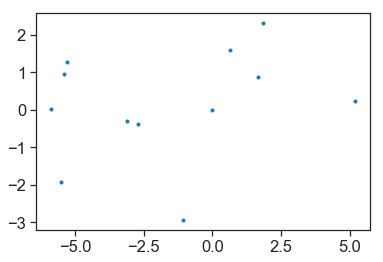

In [44]:
plt.plot(tr[:,4], tr[:,7], '.')
# plt.xlim(-3,+3)